# Support Vector Machine

## Model Specification

### SVC

SVC tries to solve the following quadratic programming problem:

$$\min_{\beta, \beta_0}\frac{1}{2}||\beta||^2+ C\sum_{i=1}^N\xi_i,$$

s.t. 

$$\xi_i\geq 0,$$
$$y_i(x_i^{\top}\beta+\beta_0)\geq 1-\xi_i, \;\;\forall i.$$ 

The labels $y_i\in\{1,-1\}$. 

If we impose $\xi_i$ to be zero above, the problem becomes a **hard margin** SVM classification. A hard margin problem can suffer from two issues: (1) it only works if the data is linearly separable; (2) it is sensitive to outliers. From the above one can see that, as $C$ becomes larger, the problem become more and more hard margin.

The above is a convenient reformulation since it is a QP. Relating to the original formulation, it can be seen that $M=\frac{1}{||\beta||}$, where the rightly classified points are at least $M$ units away from the hyperplane and it is the margin that we want to maximize. That explains why we need to minimize $||\beta||$, or otherwise we can simply scale up $\beta$ to achieve arbitrarily large margin. Note that the norm of the bias term $\beta_0$ is not penalized, because it only determines the location of the hyperplane for any given $||\beta||$.

By **Slate's condition**, the optimum of this QP exists or strong duality holds, and its duality problem is

$$\max_{\alpha}\sum_{i=1}^N \alpha_i - \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_jx_i^{\top}x_j$$

s.t. 

$$0\leq\alpha_i\leq C, \;\;\forall i=1,\dots, N$$
$$\sum_{i=1}^N\alpha_iy_i=0.$$ 

The derivation of the above can be seen in Andrew Ng's lecture notes (see Reference section). The optimal solution $\hat{\beta}$ is given by 

$$\hat{\beta}=\sum_{i=1}^N\hat{\alpha}_iy_ix_i.$$

On the other hand, the complementary slackness in the KKT Condition yields that

\begin{align*}
\hat{\alpha_i}[y_i(x_i^{\top}\hat{\beta}+\beta_0)- (1-\hat\xi_i)]=0,\;\;\forall i;\\
(C-\hat\alpha_i)\hat\xi_i=0,\;\;\forall i.
\end{align*}

$\hat{\alpha_i}$ is nonzero for those observations with $y_i(x_i^{\top}\hat{\beta}+\beta_0)- (1-\xi_i)=0$, the so-called **support vectors**. Support vectors are so named, since it is be seen clearly that $\hat{\beta}$ above is determined by support vectors, while non-support vectors are with $\alpha_i=0$.

Among the support vectors,

- some lie on the edge of the margin $(\hat{\xi_0}=0)$ and hence will be characterized by $0<\hat{\alpha}_0<C$;
- the remainder ($\hat{\xi_0}>0$ and $\hat{\alpha_i}=C$) is within the margin band or even at the wrong side of the boundary.

For a geometric exposition, see the section of Results Interpretation.

Besides making the intuition of support vectors clear, the duality formulation of the problem also lend itself to the **kernel trick**: $x\rightarrow\phi(x)$. The beauty of this is that we only need to know the **kernel**: $K(x, y)=\phi(x)^{T}\phi(y)$, without the need to explicitly calculate $\phi$. Sometimes it is even impossible to calculate $\phi$; for example, $\phi$ corresponding to the Gaussian RBF kernel is of infinite dimension. As such, one only need to replace any inner product $x_i^{T}x_j$ with $K(x_i, x_j)=\phi(x_i)^{T}\phi(x_j)$ in the above duality problem and be done. Note that prediction is done via the kernel function too, since prediction at any value $x$ is a function of $\hat\beta\phi(x)$ which can be expressed as the kernel function. 
- The theoretical foundation of kernel trick is the **Mercer's Theorem**: roughly, if a function $K(a, b)$ respects a few mathematical conditions called Mercer’s conditions (e.g., $K$ must be continuous and symmetric in its arguments so
that $K(a, b) = K(b, a)$, etc.), then there exists a function $\phi$ that maps $a$ and $b$ into another space (possibly with much higher dimensions) such that $K(a, b) = \phi(a)^{T} \phi(b)$.

- Using a kernel for SVM (and in fact for any machine learning algorithm that eventually only cares about inner products and hence able to accommodate the kernel trick) can be thought of as blowing up the features to higher dimensional space. But this may pay the cost of overfitting; see discussions below.

- The so-called Sequential Minimization Optimization (**SMO**) algorithm is used to solve for kernelized or ordinary SVM.

More generally, we have the following **Representer Theorem** (where SVM is a special case) - the proof is just to consider any $w$ projected onto the subspace spanned by $\phi(x_n)$.

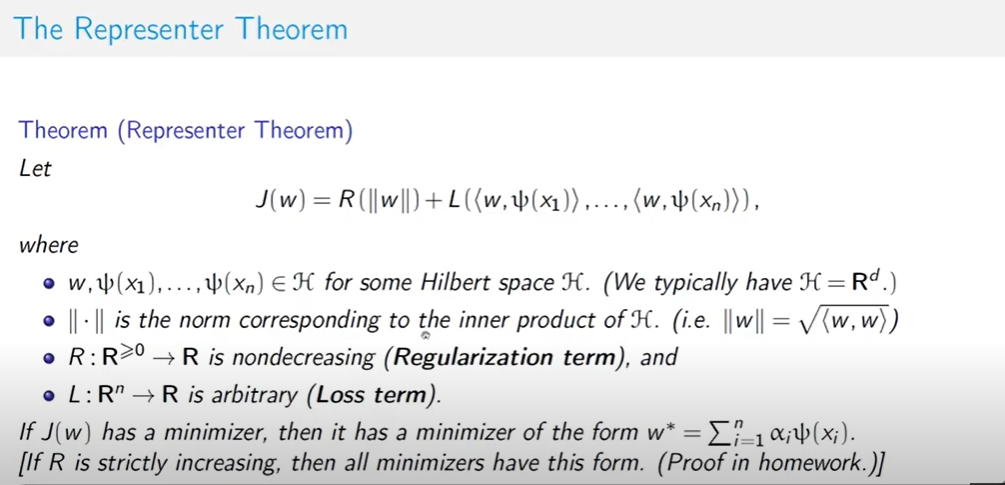

Substituting $w^*$ in, we now get the objective function as 
\begin{align}
J(\alpha) = R(\alpha^{T}K\alpha) + L(\alpha K),
\end{align}
where $K=(K(x_m, x_n))_{1\leq m, n\leq N}$. 

There are also several easy ways to make kernels from old ones:
- $k_{new}(w, x)=k_1(w, x)+k_2(w, x)$
- $k_{new}(w, x)=\alpha k(w, x)$
- $k_{new}(w, x)=f(w)f(x)$ for any function $f(x)$
- $k_{new}(w, x)=k_1(w, x)k_2(w, x)$.

### SVR

When used for regression problems, SVR tries to minimize the following object function

$$H(\beta, \beta_0)=\sum_{i=1}^NV(y_i-x_i^{\top}\beta-\beta_0)+\frac{\lambda}{2}||\beta||^2,$$

where $V$ is the $\epsilon$-insensitive measure:

$$V_{\epsilon}(r)=(|r|-\epsilon)1(|r|\geq\epsilon).$$

The optimal solutions can be shown to have the following form

$$\hat{\beta}=\sum_{i=1}^N(\hat{\alpha}_i^{*}-\hat{\alpha}_i)x_i$$

$$\hat{f}(x)=\sum_{i=1}^N(\hat{\alpha}_i^{*}-\hat{\alpha}_i)x_i+\beta_0,$$

where $\hat{\alpha}_i^{*}$, $\hat{\alpha}_i$ are positive and solve the following QP:

$$\min_{\hat{\alpha}_i^{*}, \hat{\alpha}_i}\epsilon\sum_{i=1}^N(\hat{\alpha}_i^{*}+\hat{\alpha}_i)-\sum_{i=1}^Ny_i(\hat{\alpha}_i^{*}-\hat{\alpha}_i)+\frac{1}{2}\sum_{i,j=1}^N(\hat{\alpha}_i^{*}-\hat{\alpha}_i)(\hat{\alpha}_j^{*}-\hat{\alpha}_j)x_i^{\top}x_j$$

such that

$$0\leq \alpha_i, \alpha_i^{*}\leq \frac{1}{\lambda},$$

$$\sum_{i=1}^N(\hat{\alpha}_i^{*}-\hat{\alpha}_i)=0,$$

$$\alpha_i\alpha_i^{*}=0.$$

Due to the nature of these constraints, typically only a subset of the solution values $(\hat{\alpha}_i^{*}-\hat{\alpha}_i)$ are nonzero, where the corresponding points are called the support vectors, and $\hat{f}(x)$ is just a function of these support vectors.

### Variants and Generalizations

#### Extension to Multi-class

When dealing with multi-class, especially when there are a large number of classes, the one-vs-all approach may be unwieldy. Another trick to get around that is making the class label as another feature and stack up the feature space. For instance, like the following,

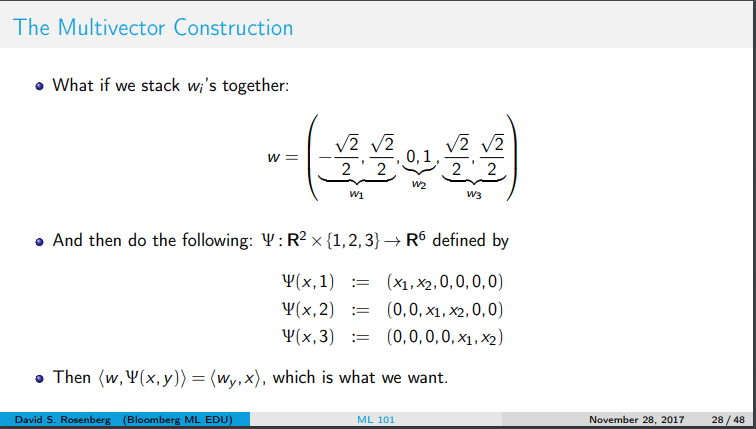

Then SVM can be generalized to the following newly defined margin and proceeds to maximize it.

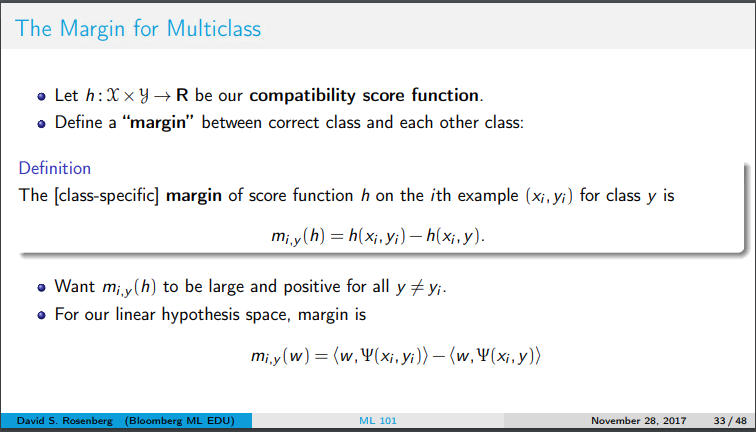

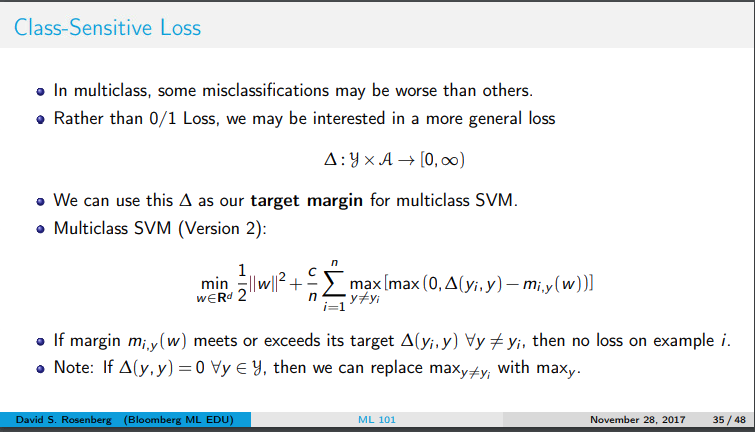

**Scores and Probabilities**

Classical SVM does not provide class probabilities, which is a drawback. In the binary case, the probabilities are calibrated using **Platt scaling**: logistic regression on the SVM’s scores, fit by an additional cross-validation on the training data. In the multiclass case, this is extended as per Wu et al. (2004); see the Reference section for the two papers. But the probability estimates may be inconsistent with the scores, in the sense that the “argmax” of the scores may not be the argmax of the probabilities. (E.g., in binary classification, a sample may be labeled by predict as belonging to a class that has probability <½ according to predict_proba.) Platt’s method is also known to have theoretical issues.

**Support Vector Machine and Kernels**

In ESL, the term support vector machine refers to SVC and SVR with kernels, which uses the inner product of kernel functions $h(x)$ instead of $x$. Popular kernels are all supported in `sklearn`:

- `'linear'`: $x^{\top}x'$
- `'polynomial'`: $(\gamma x^{\top}x' + r)^d$. $d$ is specified by keyword `degree`, $r$ by `coef0` in `sklearn`.
- `'rbf'`: $\exp(-\gamma \|x-x'\|^2)$. $\gamma$ is specified by keyword `gamma` in `sklearn`, must be greater than $0$. The $\phi$ function for `'rbf'` is $[\phi(x)]_n=\frac{1}{n!}e^{-x^2/2}x^n$ for $\gamma=1$.
- `'sigmoid'`: $(\tanh(\gamma \langle x,x'\rangle + r))$, where $r$ is specified by `coef0` in `sklearn`.

You can also specify your own `python` function as kernel in `sklearn` - note that the kernel has to be positive semi-definite.

## Theoretical Properties

### Advantages

- Effective in high dimensional spaces (even infinite dimension space; see discussion of kernel tricks above)
- Still applicable in cases where number of dimensions is greater than the number of samples (again see the discussion of kernel tricks above). And it performs reasonably well empirically; see empirical properties below.
- Uses a subset of training points in the decision function - the support vectors, so it is also memory efficient. This is true especially when it is kernelized: to make a prediction, SVM only needs to access all support vectors, while in contract, the kernelized ridge regression will need to access all training sample points.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
- Broader applicability: while LDA or naive hyperplane separation cannot deal with the observations that lie in the wrong side of the boundary, SVM can.

### Disadvantages

- **SVM does not quite handle curse-of-dimensionality**. That is, being able to use kernel and 'blow up' feature dimension does not make SVM immune to overfitting, though kernels have in-built regularizations in that the 'coefficients' for higher dimensions are restricted to be small (think about RBF - the partial sum of the coefficients need to converge). The kernel does not adapt itself to concentrate on any subspaces. If the feature space dimension is high and separation only occurs in a linear subspace, the kernel would not easily find the structure and would suffer from having too many dimensions to search. In fact, a simulation study in Section 12.3.4. of ESL demonstrates that SVM can be adversely affected by the noisy dimensions.
- **SVMs do not directly provide probability estimates**. These are calculated using an expensive five-fold cross-validation

### Relation to Other Models

**SVC vs. LDA**

- SVC has wider application than LDA and naive hyperplane separation, in that points can reside in the wrong side of boundary.
- In SVM, the decision boundary is not affected by points well inside their class boundary. To contrast, in LDA, the decision boundary is determined by the covariance of the class distributions and the positions of the class centroids. As such, even points well within boundary play a role in the determination of the boundary.

**Hinge loss of SVC**

It can be shown that equivalently SVC is minimizing the following loss

$$\min_{\beta_0, \beta}\sum_{i=1}^N\left[1-y_i(x_i^{\top}\beta+\beta_0)\right]_{+}+\frac{\lambda}{2}||\beta||^2,$$

with $\lambda=\frac{1}{C}$ as in the classical formulation. This gives rise to the **hinge loss** function.

Here are how hinge loss compare with other loss function used in classification; pictures taken from ESL (see also the graph in [Boosting](Boosting.ipynb)). 

- Note that in Table 12.1 below, 'Minimizing Function' means the loss it tries to estimate at the population level. Whereas the hinge loss estimates the classifier $G(x)$ itself, all the others estimate a transformation of the class posterior probabilities. 

- All the loss-functions in Table 12.1 except the squared-loss error are so called 'margin maximizing loss-functions'. This means that if the data are separarable, the limit of $\beta$ as $\lambda\rightarrow0$ defines the optimal separating hyperplane.

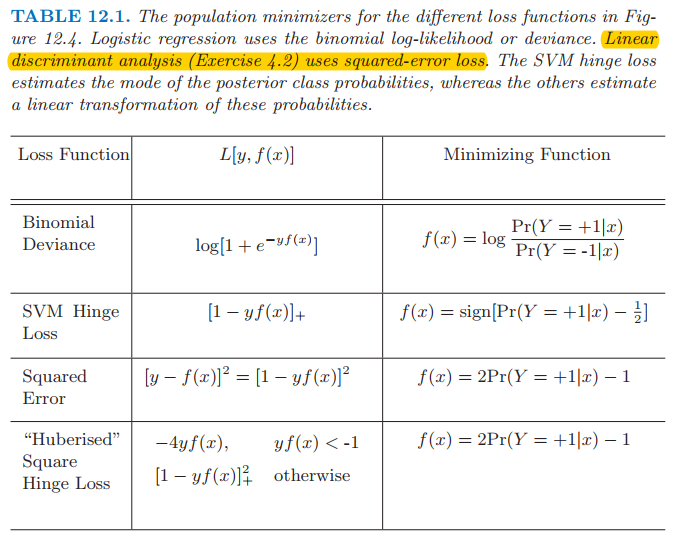

**SVM vs. MARS**

As mentioned before, SVM with kernel does not automatically search for the fine subspace that benefit the classification the most. This is something [MARS](MARS.ipynb) is designed to do. 

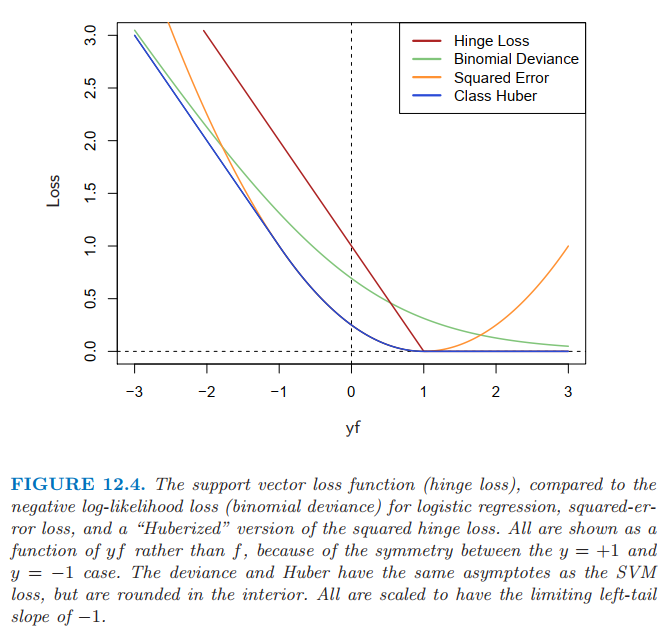

## Empirical Performance

### Advantages

- SVC are usually good for small- or medium-sized complex feature classification problems, according to < Hands-on Machine Learning >. But it probably not scale well for its complexity in $n_{samples}$.

- In general, it is a good out-of-the-box machine learning model to try.

- Somewhat surprisingly, when in high dimension, i.e. $p ≫ N$, the unregularized support vector classifier often works about as well as the best regularized version. Overfitting often does not seem to be a problem, partly because of the insensitivity of misclassification loss.

### Disadvantages

## Implementation Details and Practical Tricks

**`SVC` in `sklearn`**

In [ ]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
clf = SVC(C=1.0, probability=False, class_weight=None, degree=3, gamma='auto', kernel='rbf')
clf.fit(X, y) 
print(clf.predict([[-0.8, -1]]))

**Selected Parameters**

- **`C`**:

    Penalty parameter $C$ of the error term. Especially when nonlinear kernel is present, $C$ can be viewed as controlling the complexity or bias/variance tradeoff of the model - the larger the $C$, the more complex the model and higher variance.


- **`kernel`**:

    Specifies the kernel type to be used in the algorithm. It must be one of `‘linear’`, `‘poly’`, `‘rbf’`, `‘sigmoid’`, `‘precomputed’` or a callable. If none is given, `‘rbf’` will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape `(n_samples, n_samples)`.


- **`degree`**:

    Degree of the polynomial kernel function (`‘poly’`). Ignored by all other kernels.


- **`gamma`**:

    Kernel coefficient for `‘rbf’`, `‘poly’` and `‘sigmoid’`. If gamma is `‘auto’` then `1/n_features` will be used instead.
    
- **`coef0`**:

    Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.


- **`probability`**:

    Whether to enable probability estimates, using the CV method by Platt. This must be enabled prior to calling fit, and will slow down that method. If confidence scores are required, but these do not have to be probabilities, then it is advisable to set `probability=False` and use `decision_function` instead of `predict_proba`.


- **`class_weight`**: {dict, ‘balanced’}, optional

    As many other classifiers in `sklearn`, `SVC` also has this option to deal with unbalanced classification. Set the parameter `C` of class `i` to `class_weight[i]*C` for SVC. If not given, all classes are supposed to have weight one. The `“balanced”` mode uses the values of `y` to automatically adjust weights inversely proportional to class frequencies in the input data as `n_samples / (n_classes * np.bincount(y))`.
    
    
- **`decision_function_shape`**: `‘ovo’`, `‘ovr’`, `default=’ovr’`

    Whether to return a one-vs-rest (`‘ovr’`) decision function of shape `(n_samples, n_classes)` as all other classifiers, or the original one-vs-one (`‘ovo’`) decision function of `libsvm` which has shape `(n_samples, n_classes * (n_classes - 1) / 2)`. This is concerning multi-class learning. More about these two approaches in general:
    > One way to create a system that can classify the object is to produce scores for all the classes - the highest score the classifier produces represents the class the object is sorted in. This is called the one-versus-the-rest (OvR) strategy (also called one-versus-all).

    > Another strategy is to train a binary classifier for every pair of classes. This is called the one-versus-one (OvO) strategy. If there are N classes, you need to train N × (N – 1) / 2 classifiers.
    
    It is said that SVMs scale poorly with the size of the training set. Despite the default option, for SVM OvO is preferred because it is faster to train many classifiers on small training sets than to train few classifiers on large training sets. For most binary classification algorithms, however, OvR is preferred. In general, if you want to force `scikit-learn` to use one-versus-one or one-versus-the-rest, you can use the `OneVsOneClassifier` or `OneVsRestClassifier` classes. Simply create an instance and pass a classifier to its constructor (it does not even have to be a binary classifier).

**Selected Attributes**

- **`support_vectors_`**:

    Support vectors.


- **`support_`**:

    Indices of support vectors.


- **`n_support_`**:

    Number of support vectors for each class.
    
    
- **`coef_`** : array, `shape = [n_class-1, n_features]`

    Weights assigned to the features (coefficients in the primal problem). This is only available in the case of a linear kernel.

**Selected Methods**

- **`decision_function(X)`**:

    Distance of the samples `X` to the separating hyperplanes
    
    
- **`score(X, y)`**:

    Return the mean accuracy on the given test data and labels


- **`predict_log_proba(X)`**:

    Compute log probabilities of possible outcomes for samples in `X`.


- **`predict_proba`**:

    Compute probabilities of possible outcomes for samples in `X`.

**`linearSVC` in `sklearn`**

Linear Support Vector Classification. Similar to `SVC` with parameter `kernel=’linear’`, but implemented in terms of `liblinear` rather than `libsvm`, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples. Note that the underlying `C` implementation uses a random number generator to select features when fitting the model. It is thus not uncommon to have **slightly different results for the same input data**. If that happens, try with a smaller tol parameter.Following are the parameters that are not available in `SVC`.

**Selected Parameters**

- **`penalty`**: string, `l1` or `l2` (default=`l2`)

    Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
    

- **`loss`** : string, ‘hinge’ or ‘squared_hinge’ (default=’squared_hinge’)

    Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
    

- **`dual`** : bool, (default=True)

    Select the algorithm to either solve the dual or primal optimization problem. Prefer `dual=False` when `n_samples > n_features`.

**`NuSVC` in `sklearn`**

The interface of `NuSVC` is similar to `SVC` above, with a different parameter `nu`. `NuSVC` is used as an alternative to `SVC`; see the section of Results Interpretation, Metrics and Visualization below for more details.

- **`nu`** : float, optional (default=0.5)
   
   An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors. Should be in the interval (0, 1].

**'`SVR`' in `sklearn`**

The interface of `SVR` is similar to `SVC` and `NuSVC` above.

**Tips on Practical Use on `sklearn` and beyond**

- Avoiding data copy: For `SVC`, `SVR`, `NuSVC` and `NuSVR`, if the data passed to certain methods is not C-ordered contiguous, and double precision, it will be copied before calling the underlying C implementation. You can check whether a given numpy array is C-contiguous by inspecting its flags attribute.

    For `LinearSVC` (and LogisticRegression) any input passed as a numpy array will be copied and converted to the liblinear internal sparse data representation (double precision `floats` and `int32` indices of non-zero components). If you want to fit a large-scale linear classifier without copying a dense numpy C-contiguous double precision array as input we suggest to use the `SGDClassifier` class instead. The objective function can be configured to be almost the same as the LinearSVC model.

- Kernel cache size: For `SVC`, `SVR`, `nuSVC` and `NuSVR`, the size of the kernel cache has a strong impact on run times for larger problems. If you have enough RAM available, it is recommended to set cache_size to a higher value than the default of 200(MB), such as 500(MB) or 1000(MB).

- Setting `C`: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it. It corresponds to regularize more the estimation: it thus increases training error but probably generalizes better.

- Support Vector Machine algorithms are **not scale invariant**, so it is highly recommended to scale your data. For example, scale each attribute on the input vector `X` to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. `sklearn` has designated functions to preprocess data; see `StandardScaler`.

- Using L1 penalization as provided by `LinearSVC`(loss='l2', penalty='l1', dual=False) yields a sparse solution, i.e. only a subset of feature weights is different from zero and contribute to the decision function. Increasing C yields a more complex model (more feature are selected). The C value that yields a “null” model (all weights equal to zero) can be calculated using `l1_min_c`.

**Complexity**

Support Vector Machines are powerful tools, but their compute and storage requirements increase rapidly with the number of training vectors. The core of an SVM is a quadratic programming problem (QP), separating support vectors from the rest of the training data. The QP solver used by this `libsvm`-based implementation scales between $O(n_{features} \times n_{samples}^2)$ and $O(n_{features} \times n_{samples}^3)$ depending on how efficiently the `libsvm` cache is used in practice (dataset dependent). If the data is very sparse $n_{features}$ should be replaced by the average number of non-zero features in a sample vector.

Also note that for the linear case, the algorithm used in `LinearSVC` by the `liblinear` implementation is much more efficient than its `libsvm`-based `SVC` counterpart and can scale almost linearly to millions of samples and/or features.

## Use Cases

**Novelty and Outlier Detection**

See the paper of Schölkopf, Bernhard, et al. It is implemented in `sklearn` by `svm.OneClassSVM`. But did not read this in detail.

## Results Interpretation, Metrics and Visualization

**The Relation between $C$ and the margin width in linear kernel**

The following example is taken from ESL. It seems when $C$ is smaller (from $10000$ to $0.01$), the margin becomes wider. The idea is that $C$ determines the tradeoff between minimizing sum of $\xi$ vs. the squared norm of $\beta$. 
- When $C$ is small, the optimization emphasis more on minimizing $||\beta||$. Since $M=\frac{1}{||\beta||}$, the margin is enlarged. 
- Another way to look at this is that when $C$ is small, there are more $\xi_i$ which become positive. Since support vectors are characterized by $\xi_i\geq0$, more points will become support vector, residing on the wrong side of the boundary, and enlarging the margin (intuitively speaking). On the other hand, the intuition to judge whether there are more or less support vectors by examining $\hat\alpha_j$ does not seem to fly: for a smaller $C$, more $\hat\alpha_j$ are likely to be smaller (since $0\leq \alpha_j \leq C$), but it does not say anything about any of them any likely to be zero ($\hat\alpha_j=0$ means that corresponding vector is a support vector).
- Therefore, when the SVC overfits, it may be beneficial to reduce $C$: it will increase training errors as more points become mis-classified in the training set, but it may generalize better.

That being said, it is hard to determine the value of $C$ in order to have the given proportion of points in the sample being support vectors. Interestingly, the leave-one-out-validation error can be bounded above by the proportion of support points in the data. The reason is that leaving out an observation that is not support vector will not change the solution. This gives rise to `NuSVC` in `sklearn`.

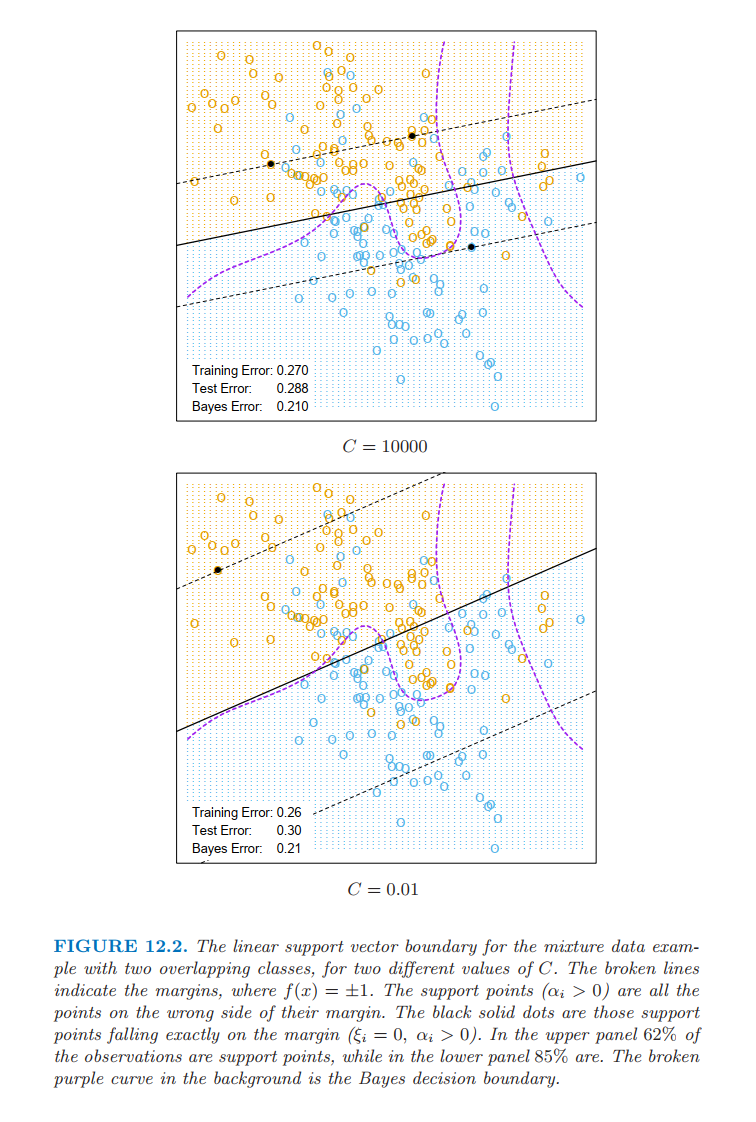

**The Relation between $C$ and the robustness of the SVM**

At a high-level, the smaller the $C$, the more regularized it is, and it will be more robust - or higher bias, less variance.

One can also understand this from the constraint $0\leq \alpha_j \leq C$\: the smaller the $C$, the smaller the $\hat\alpha_j$, and each point $x_i$'s contribution to the optimal solution $\hat{\beta}=\sum_{i=1}^N\hat{\alpha}_iy_ix_i$ is more likely to be small, which in turn means the algo is more robust.

## References

- ESL, Section 12.1-12.3
- [scikit-learn Document 1.4](http://scikit-learn.org/stable/modules/svm.html#svm-implementation-details)
- Andrew Ng's CS229 2011 Course note: Convex Optimization Overview.
- < Hands-on Machine-Learning >, Chapters 3, 5.
- MLEDU, Lectures 10, 13, 24.

### Further Reading

- Wu, Lin and Weng, “Probability estimates for multi-class classification by pairwise coupling”, JMLR 5:975-1005, 2004. (on calculating class probs for multi-class svm)
- Platt “Probabilistic outputs for SVMs and comparisons to regularized likelihood methods” <http://www.cs.colorado.edu/~mozer/Teaching/syllabi/6622/papers/Platt1999.pdf>. (on calculating class probs for binary-class svm)

## Misc.